In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## MovieLens 데이터 불러오기

In [2]:
data_paths = './data/ml-latest-small/'

os.listdir(data_paths)

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [3]:
tag_df = pd.read_csv(data_paths + 'tags.csv', encoding='utf-8')
rating_df = pd.read_csv(data_paths + 'ratings.csv', encoding='utf-8')
movie_df = pd.read_csv(data_paths + 'movies.csv', encoding='utf-8')

In [5]:
rating_df.set_index('userId', inplace=True)
movie_df.set_index('movieId', inplace=True)

print(rating_df.shape)
display(rating_df.head())

print(movie_df.shape)
display(movie_df.head())

(100836, 3)


,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


(9742, 2)


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


### 전체 장르 확인

In [6]:
movie_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [14]:
all_genre = [ i.split('|') for i in movie_df['genres']]
all_genre[:3]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance']]

In [16]:
import itertools

genres = list(set(list(itertools.chain(*all_genre))))
print(genres)
print(len(genres))

['Crime', 'Adventure', 'Film-Noir', 'Drama', 'Comedy', 'Animation', 'Sci-Fi', 'Western', 'Thriller', 'Musical', 'Mystery', '(no genres listed)', 'Children', 'Documentary', 'Action', 'Romance', 'War', 'IMAX', 'Horror', 'Fantasy']
20


In [45]:
genres_df = pd.DataFrame(columns=genres, index=movie_df.index)
genres_df.head()

,Crime,Adventure,Film-Noir,Drama,Comedy,Animation,Sci-Fi,Western,Thriller,Musical,Mystery,(no genres listed),Children,Documentary,Action,Romance,War,IMAX,Horror,Fantasy
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
genres_df.loc[1].name

1

In [47]:
count = 0

for i, row in genres_df.iterrows(): # itterrows 행 => index, Series
    movie_id = row.name # Movie ID를 가져옴

    list_of_genres = movie_df.loc[movie_id]['genres'].split('|')

    genres_df.loc[movie_id][list_of_genres] = 1

In [48]:
genres_df

,Crime,Adventure,Film-Noir,Drama,Comedy,Animation,Sci-Fi,Western,Thriller,Musical,Mystery,(no genres listed),Children,Documentary,Action,Romance,War,IMAX,Horror,Fantasy
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1
193583,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
193585,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)

print(genres_df.shape)
display(genres_df.head())

(9742, 21)


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


- get_dummies 활용

In [49]:
genres_df = movie_df['genres'].str.get_dummies(sep='|')
genres_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [60]:
movies_df = pd.concat([movie_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,6
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [62]:
movies_df = movies_df.drop('genres', axis=1)
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,6
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### 특정 장르의 평점 (사용자 확인)

In [63]:
movies_df.columns

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'num_genres'],
      dtype='object')

In [73]:
animation_id_list = movies_df['title'][movies_df.Animation == 1].index

animation_df = rating_df[rating_df['movieId'].isin(animation_id_list)]
animation_df.shape[0]

6988

In [77]:
# 영화의 평균 평점
animation_df.groupby('movieId')['rating'].mean().sort_values()

movieId
5672      0.5
91414     0.5
136297    0.5
6371      0.5
175475    0.5
         ... 
91355     5.0
172875    5.0
108795    5.0
170597    5.0
172793    5.0
Name: rating, Length: 610, dtype: float64

In [80]:
# 사용자들이 남긴 평균 평점
animation_df.groupby('userId')['rating'].mean()

# 1번 사용자는 애니메이션을 좋아함
# 3번 사용자는 애니메이션 좋아하지 않음
# ...

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

In [84]:
def user_genres_rating(genre):
    idx_list = movies_df['title'][movies_df[genre] == 1].index
    scores = rating_df[rating_df.movieId.isin(idx_list)].groupby('userId')['rating'].mean()
    return scores

In [86]:
user_genres_rating('Action')

userId
1      4.322222
2      3.954545
3      3.571429
4      3.320000
5      3.111111
         ...   
606    3.178808
607    3.722222
608    3.330325
609    3.090909
610    3.600580
Name: rating, Length: 608, dtype: float64

In [87]:
user_genres_rating('Drama')

## 3번 사용자는 애니메이션 0.5, 액션 3.5, 드라마 0.75
# 액션을 좋아하나봐

userId
1      4.529412
2      3.882353
3      0.750000
4      3.483333
5      3.800000
         ...   
606    3.787966
607    4.012195
608    3.437500
609    3.368421
610    3.874739
Name: rating, Length: 610, dtype: float64

In [88]:
user_genres_rating('Documentary')

## 3번 사용자는 다큐멘터리 보지도 않음

userId
2      4.333333
4      4.000000
16     4.000000
17     3.500000
18     3.944444
         ...   
605    3.000000
606    3.800000
608    3.000000
609    3.000000
610    4.200000
Name: rating, Length: 223, dtype: float64

### 장르간 상관관계

In [89]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,...,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816,-0.066751
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,...,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600,0.420903
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,...,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136,0.432018
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,...,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378,0.298507
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,...,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890,0.286041
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,...,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622,0.041229
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,...,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997,0.277350
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,...,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915,-0.190304
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,...,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060,0.066920
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,...,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441,0.354829


<AxesSubplot:>

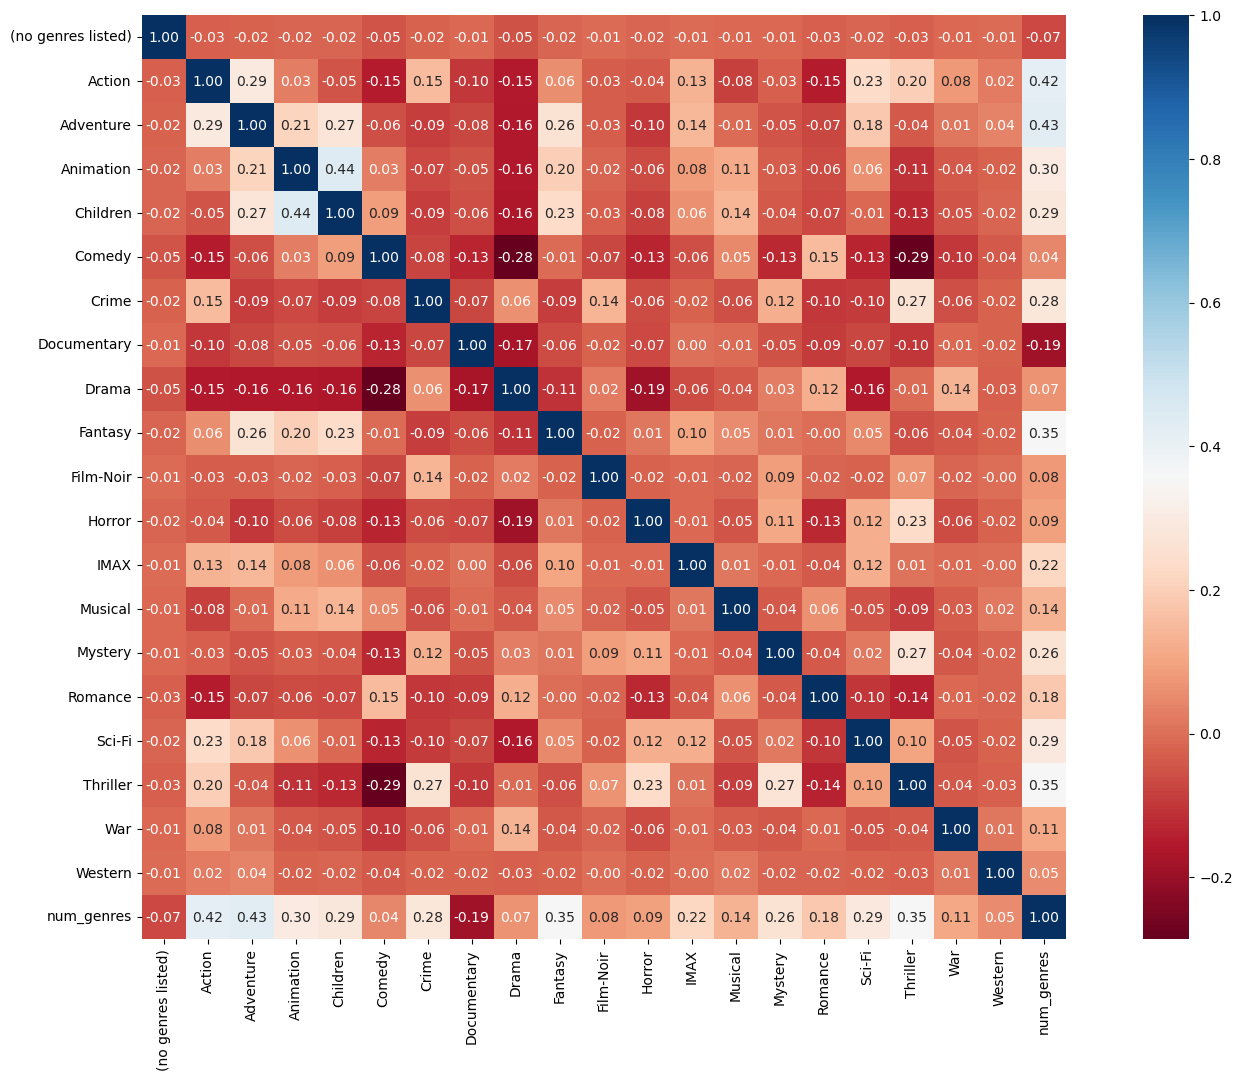

In [92]:
plt.figure(figsize=(20, 12))
sns.heatmap(genres_df.corr(), square=True,
            annot = True, fmt = '.2f',
            cmap = 'RdBu')

### 영화 이름, 연도 분석

In [96]:
movies_df.tail()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
193585,Flint (2017),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
193609,Andrew Dice Clay: Dice Rules (1991),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [133]:
movies_df['year'] = movies_df['title'].str.extract(r'(\(\d\d\d\d\))')[0].str.replace(')', '').str.replace('(', '')

In [136]:
movies_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
num_genres             0
year                  13
dtype: int64

In [143]:
## 결측치
movies_df.loc[movies_df['year'].isna()]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres,year
movieId,,,,,,,,,,,,,,,,,,,,,
40697,Babylon 5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,NaN
140956,Ready Player One,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,6,NaN
143410,Hyena Road,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
149334,Nocturnal Animals,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,4,NaN
156605,Paterson,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
162414,Moonlight,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NaN
167570,The OA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
171495,Cosmos,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN


In [149]:
movies_df[movies_df['(no genres listed)'] == 1]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres,year
movieId,,,,,,,,,,,,,,,,,,,,,
114335,La cravate (1957),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1957
122888,Ben-hur (2016),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2016
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2017
129250,Superfast! (2015),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2015
132084,Let It Be Me (1995),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1995
134861,Trevor Noah: African American (2013),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2013
141131,Guardians (2016),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2016
141866,Green Room (2015),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2015
142456,The Brand New Testament (2015),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2015


In [153]:
movies_df = movies_df.dropna(axis=0)
movies_df.shape

(9729, 23)

- 연도별 영화 데이터 분석

In [157]:
movie_year = movies_df.groupby('year').count()['title']
movie_year

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [178]:
movie_year.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

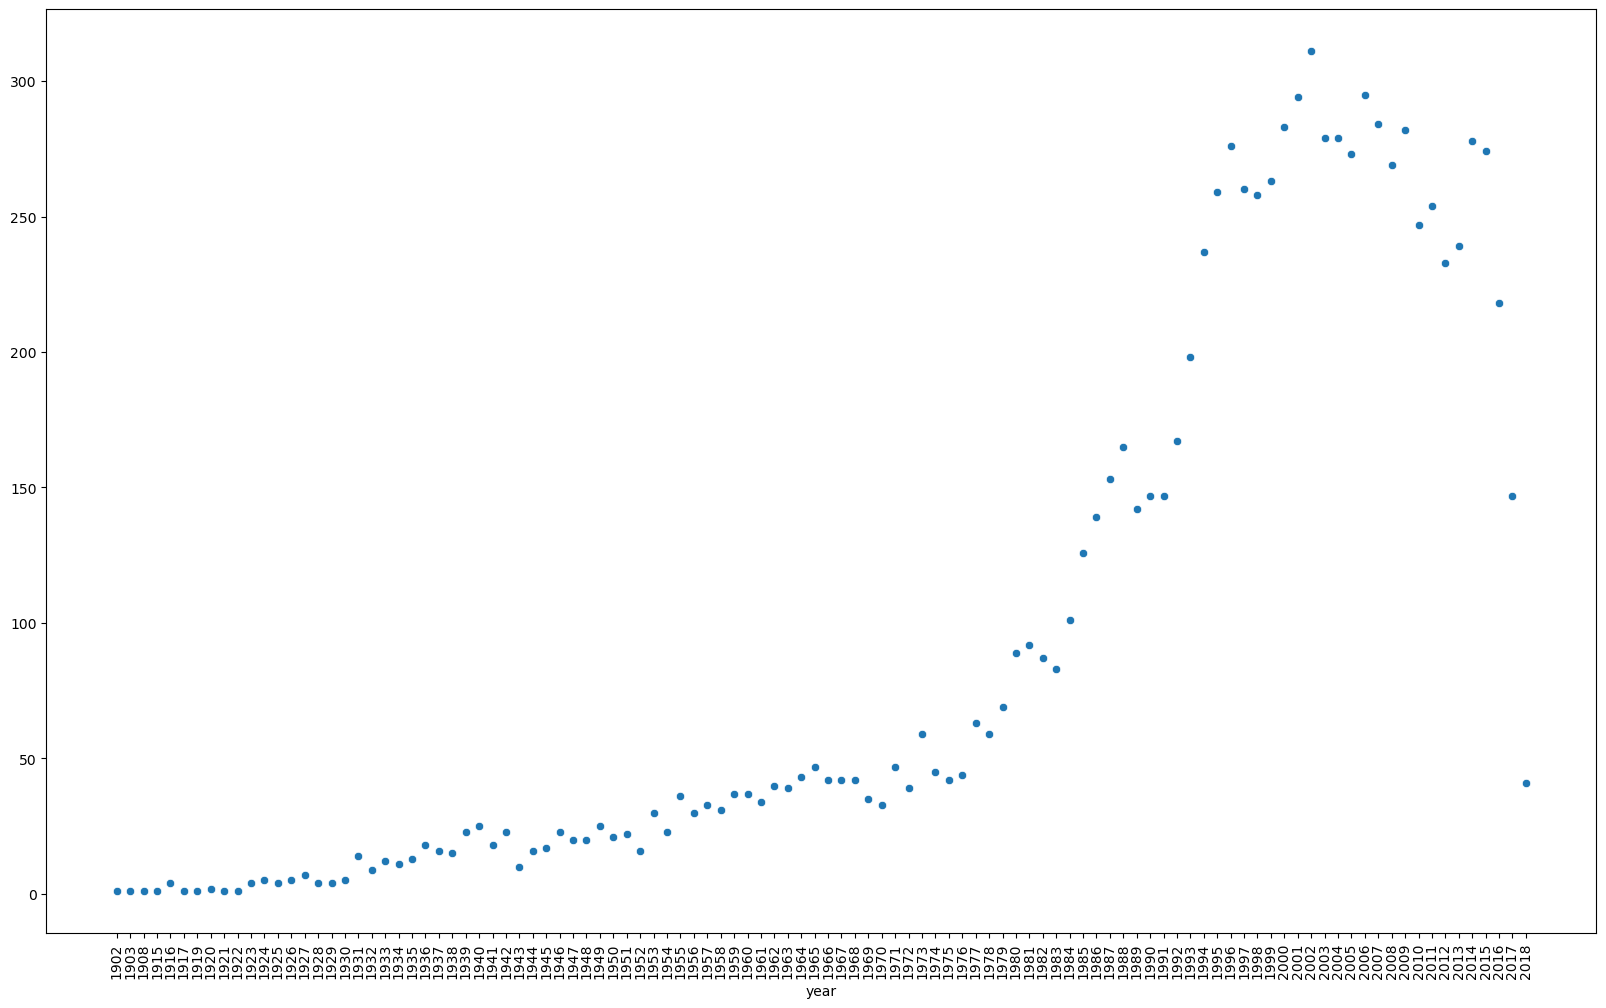

In [177]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=movie_year, x=movie_year.index, y=movie_year.values,)
plt.xticks(rotation=90)

- 영화와 개봉연도, 그리고 평점

In [180]:
rating_df

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [188]:
movie_rating_df = pd.merge(left=movies_df, right=rating_df, left_index=True, right_on='movieId')
movie_rating_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Thriller,War,Western,num_genres,year,movieId,rating,timestamp
userId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,10,1995,1,4.0,964982703
5,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,10,1995,1,4.0,847434962
7,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,10,1995,1,4.5,1106635946
15,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,10,1995,1,2.5,1510577970
17,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,10,1995,1,4.5,1305696483


In [191]:
movie_year_mean = movie_rating_df.groupby('year').mean()['rating']
movie_year_mean


year
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.600000
          ...   
2014    3.512879
2015    3.410386
2016    3.387261
2017    3.578091
2018    3.483516
Name: rating, Length: 106, dtype: float64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]),
 [Text(0, 0, '1902'),
  Text(1, 0, '1903'),
  Text(2, 0, '1908'),
  Text(3, 0, '1915'),
  Text(4, 0, '1916'),
  Text(5, 0, '1917'),
  Text(6, 0, '1919'),
  Text(7, 0, '1920'),
  Text(8, 0, '1921'),
  Text(9, 0, '1922'),
  Text(10, 0, '1923'),
  Text(11, 0, '1924'),
  Text(12, 0, '1925'),
  Text(13, 0, '1926'),
  Text(14, 0, '1927'),
  Text(15, 0, '1928'),
  Text(16, 0, '1929'),
  Text(17, 0, '

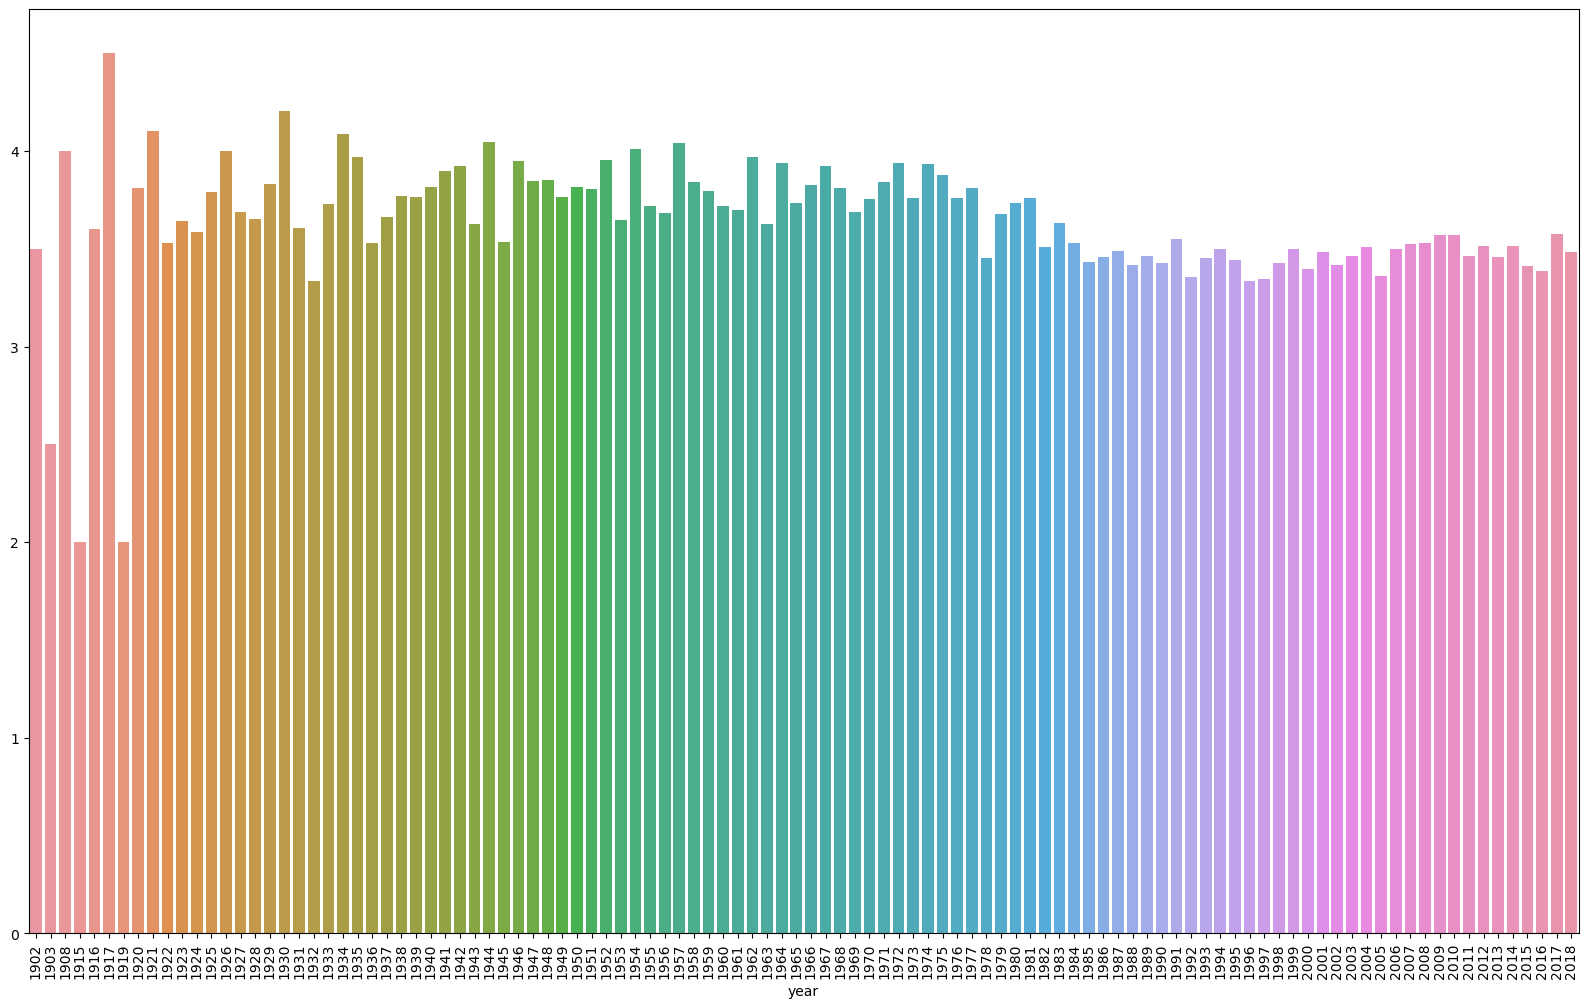

In [199]:
plt.figure(figsize=(20, 12))
sns.barplot(x=movie_year_mean.index, y=movie_year_mean.values)
plt.xticks(rotation = 90)

In [211]:
movie_rating_df[movie_rating_df['year'] == '2017']['rating'].mean()

3.5780911062906724